In [92]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
import os
import pandas as pd
import numpy as np
sys.path.append('../../')
import utils
import matplotlib.pyplot as plt

In [32]:
FILENAME = "cal_1"
NANO_FILENAME = "./" + FILENAME + ".csv"
TELEMETRY_FILENAME = "./" + FILENAME + "_telemetry.txt"

In [74]:
nano_df = pd.read_csv(NANO_FILENAME, names=["drop", "drop", "time", 
                                            "Fx", "Fy", "Fz",
                                            "Mx", "My", "Mz",
                                            "Ax", "Ay", "Az"])

In [75]:
nano_df.drop(nano_df.columns[[0,1,9,10,11]], axis=1, inplace=True)

In [99]:
nano_df.head(10)

,time,Fx,Fy,Fz,Mx,My,Mz
0,0.0000,0.000059,0.003730,-0.005284,-0.015040,-0.069441,0.067460
1,0.0001,0.000069,0.003768,-0.005235,-0.015478,-0.068773,0.067400
2,0.0002,0.000079,0.003806,-0.005185,-0.015906,-0.068083,0.067331
3,0.0003,0.000088,0.003844,-0.005134,-0.016323,-0.067374,0.067254
4,0.0004,0.000098,0.003881,-0.005081,-0.016729,-0.066644,0.067167
5,0.0005,0.000108,0.003917,-0.005027,-0.017124,-0.065896,0.067071
6,0.0006,0.000117,0.003954,-0.004972,-0.017508,-0.065128,0.066966
7,0.0007,0.000126,0.003989,-0.004916,-0.017880,-0.064343,0.066852
8,0.0008,0.000136,0.004024,-0.004858,-0.018240,-0.063539,0.066729
9,0.0009,0.000145,0.004058,-0.004800,-0.018588,-0.062719,0.066596


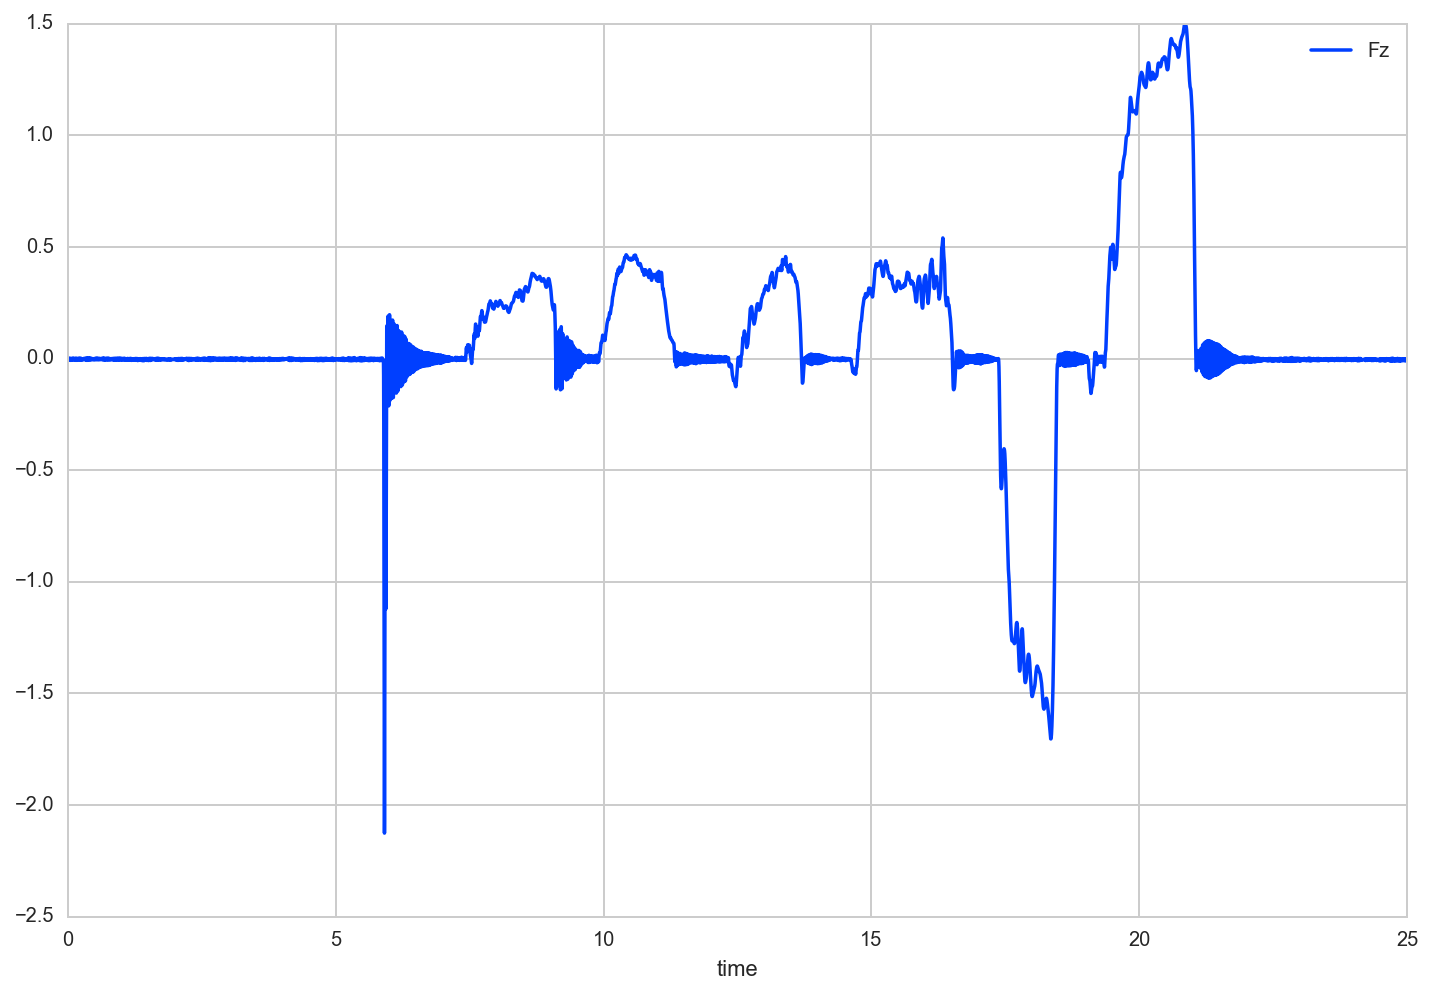

In [133]:
nano_df.plot(x="time", y="Fz", xlim=(0, 25), figsize=(12,8))
# plt.plot(nano_df["time"], nano_df["Fz"].apply(lambda x: abs(x) > 0.1))
plt.xlim((0, 25))
plt.show()

In [147]:
maxindex = nano_df["Fz"].apply(abs).argmax(axis=0)
print maxindex

59096


In [77]:
telem_csv = utils.write_data_file_to_csv(TELEMETRY_FILENAME)
tdf = pd.read_csv(telem_csv)

In [79]:
drop_cols = list(range(1,16))
tdf.drop(tdf.columns[drop_cols], axis=1, inplace=True)

In [151]:
tdf.head(10)

,time,S1,S2,S3,S4,S5,S6,S7,S8
0,752,1801,1861,2088,2299,2057,1840,1862,1988
1,1753,1801,1861,2088,2299,2057,1840,1862,1988
2,2754,1801,1861,2088,2299,2057,1840,1862,1988
3,3755,1801,1861,2088,2299,2057,1840,1862,1988
4,4756,1803,1864,2089,2301,2057,1842,1862,1989
5,5757,1803,1864,2089,2301,2057,1842,1862,1989
6,6758,1803,1864,2089,2301,2057,1842,1862,1989
7,7759,1803,1864,2089,2301,2057,1842,1862,1989
8,8760,1803,1864,2089,2301,2057,1842,1862,1989
9,9761,1801,1862,2088,2298,2057,1840,1860,1987


In [152]:
FLICK_NANO = 59096
FLICK_SHELL = 2038

In [185]:
nano_df = nano_df[FLICK_NANO:]
nano_df.shape

(342904, 7)

In [186]:
tdf = tdf[FLICK_SHELL:]
tdf.shape

(18357, 9)

In [193]:
nano_df.index = pd.to_datetime(nano_df.index, unit='s')
nano_df.head(10)
# nano_df = nano_df.resample("10L")

/Users/cemkoc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


ValueError: cannot set values on DatetimeIndexResampler

In [188]:
tdf.head(2)

,time,S1,S2,S3,S4,S5,S6,S7,S8
2038,2041791,1789,1780,1958,2165,1808,1613,1676,1781
2039,2042792,1609,1731,1851,1970,1869,1635,1758,1984
